### Задание 4.2.1-4.2.5

### Какую выборку мы используем для тренировки моделей машинного обучения?
### Ответ:Обучающую

### Зачем нужно разделение на валидационную и тестовую выборки?
### Ответ:Модель неявно обучается на валидационной выборке, поэтому нужно дополнительно проверить её на тестовой 

### Когда выборка делится на несколько частей, какая часть обычно самая большая?
### Ответ:Обучающая 

### Как называется метод разбиения выборки на несколько частей, чтобы последовательно обучить выборку на одной части, во время обучения проверять на второй и затем финально проверить на третьей?
### Ответ: hold-out 

### Какой класс из scikit-learn нужно использовать при разбиении, чтобы учесть распределение классов?
### StratifiedShuffleSplit 

### Сколько раз происходит обучение модели при k-fold-разбиении?
### Ответ: k

### Зачем используется k-fold-разбиение?
### Ответ: Чтобы проверить точность модели на нескольких наборах данных

### Что такое leave-one-out-разбиение?
### Ответ: Разбиение, при котором валидация происходит только на одном примере и повторяется для каждого наблюдения
### Частный случай *leave-p-out*-разбиения

### Какое количество обучений модели получится при leave-2-outразбиении при размере выборки 7?
### Ответ:21

### Какой класс нужно использовать для leave-p-out разбиения с параметром 3 в sklearn?
### Ответ:LeavePOut(3)

### Задание 4.2.11-4.2.14

### С помощью какого параметра можно отключить предварительное перемешивание примеров перед *k-fold* и *hold-out*-разбиением?
### Ответ:shuffle=False

### Какой метод используется в sklearn для hold-out-разбиения?
### Ответ: train_test_split()

### В вашей выборке 500 примеров данных и 5 признаков для каждого примера. Вы используете 10-fold разбиение. Сколько примеров будет отправляться в модель на каждой итерации обучения?
### Ответ: 50 450

### На сколько частей лучше всего делить выборку при использовании метода hold-out?
### Ответ: 3

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris_data = pd.read_csv('iris.data', 
                        names=['sepal_length', 'sepal_width', 
                               'petal_length', 'petal_width', 'class'])

In [11]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [58]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(iris_data, test_size=0.15, shuffle=True)

print('Размер исходной выборки: {}\nРазмер тренировочной выборки: {}\nРазмер валидационной выборки: {}'
      .format(iris_data.shape, train.shape, valid.shape)
)

Размер исходной выборки: (150, 5)
Размер тренировочной выборки: (127, 5)
Размер валидационной выборки: (23, 5)


In [59]:
def visualize_train_valid_counts(init_data, train, valid):
    x = np.array([0, 1, 2])
    width = 0.2

    plt.figure(figsize=(15, 8))
    ax = plt.subplot(111)

    classes = list(init_data['class'].value_counts().index)

    ax.bar(x - width, list(init_data['class'].value_counts()[classes]), width, color='r', label='Исходные данные')
    ax.bar(x, list(train['class'].value_counts()[classes]), width, color='g', label='Тренировочная выборка')
    ax.bar(x, list(valid['class'].value_counts()[classes]), width, bottom=list(train['class'].value_counts()[classes]), color='b', label='Валидационная выборка')

    ax.set_ylim([0, 70])
    plt.xticks(x - width / 2, classes, fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylabel('Кол-во примеров', fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major', color='r')
    plt.grid(which='minor', linestyle=':', color='k')
    plt.legend(fontsize=15)

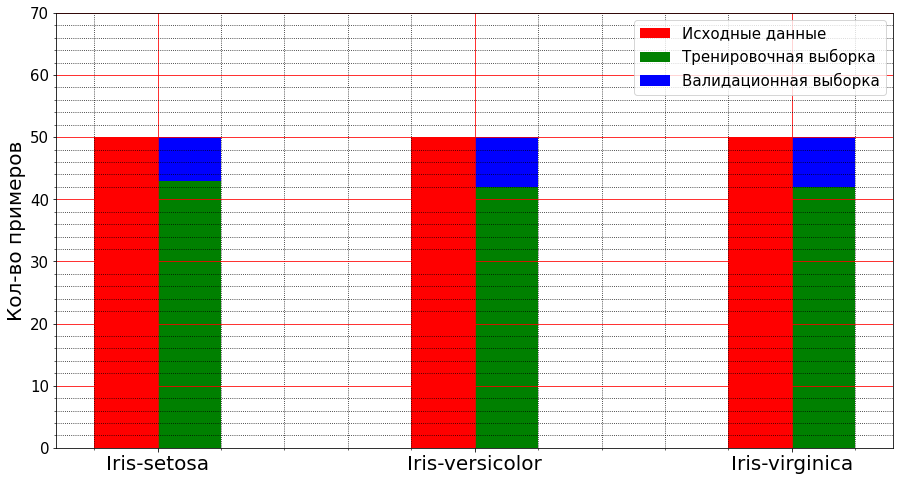

In [64]:
visualize_train_valid_counts(iris_data, s_train, s_valid)

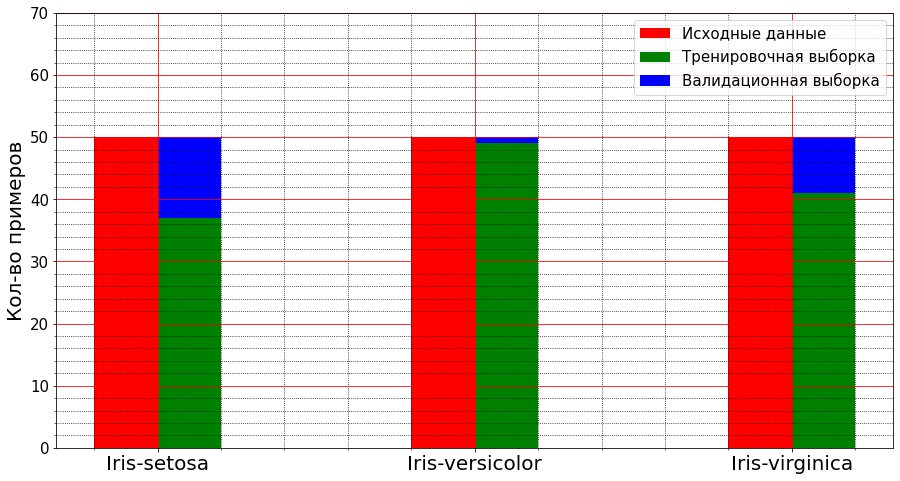

In [65]:
visualize_train_valid_counts(iris_data, train, valid)

In [66]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15)
train_indices, valid_indices = [split for split in sss.split(iris_data.iloc[:, :4], iris_data.iloc[:, 4])][0]
s_train = iris_data.iloc[train_indices]
s_valid = iris_data.iloc[valid_indices]

In [67]:
valid_frac = 0.15
test_frac = 0.15

valid_count = int(valid_frac * iris_data.shape[0])
test_count = int(test_frac * iris_data.shape[0])

train, valid_test = train_test_split(iris_data, 
                                     test_size=(valid_count + test_count))
valid, test = train_test_split(valid_test, test_size=test_count)

In [68]:
from sklearn.model_selection import KFold

# shuffle=False исключает предварительное перемешивание примеров
kf = KFold(n_splits=3, shuffle=False)

for train_index, valid_index in kf.split(iris_data):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
valid indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
train indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 

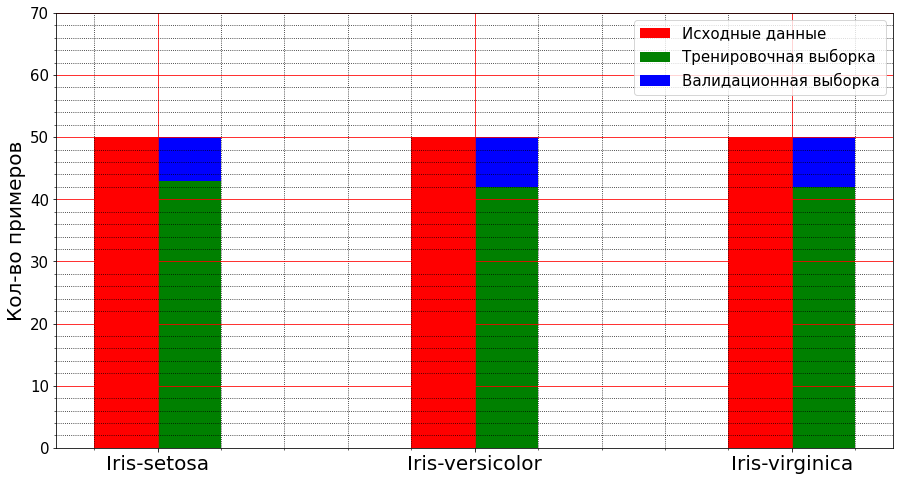

In [70]:
visualize_train_valid_counts(iris_data, s_train,s_valid)

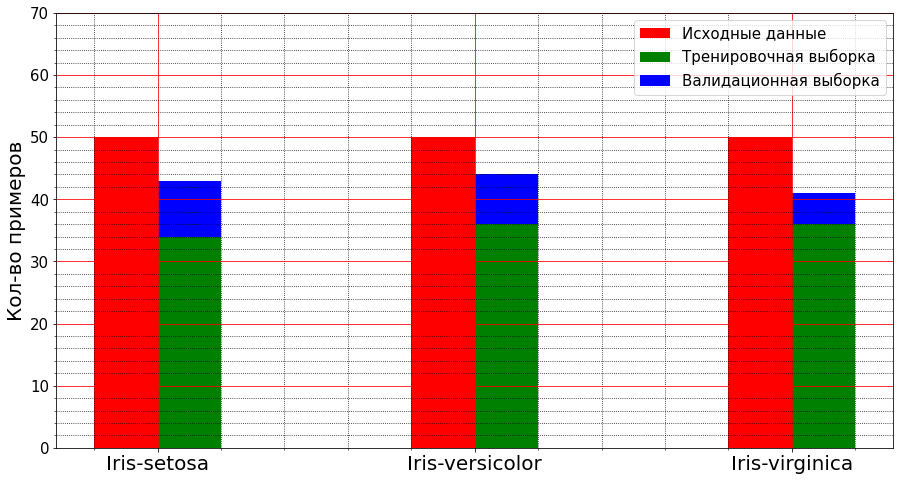

In [72]:
visualize_train_valid_counts(iris_data, train,valid)

In [34]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

for train_index, valid_index in loo.split(iris_data[:5]):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [1 2 3 4]
valid indices: [0]
train indices: [0 2 3 4]
valid indices: [1]
train indices: [0 1 3 4]
valid indices: [2]
train indices: [0 1 2 4]
valid indices: [3]
train indices: [0 1 2 3]
valid indices: [4]


In [78]:
from sklearn.model_selection import train_test_split
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [79]:
vis_data

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250301,325555,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,SANTA MARIA,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250302,325557,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250303,325562,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250304,325559,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [ ]:
### Задание 4.4.1

### Что такое метрика качества?
### Ответ:Способ проверить, насколько хорошо модель решает задачу после обучения

In [ ]:
### Задание 4.4.2

### Приведите примеры функций ошибок (loss functions).
### Ответ:MSE Cross-entropy

In [ ]:
### Задание 4.4.3

### Что должно происходить со значением функции ошибки при обучении модели?
### Ответ:Значение функции ошибки должно снижаться во время обучения

In [ ]:
### Задание 4.4.4

### Какая точность будет у алгоритма, случайно равновероятно возвращающего одно число из списка [1, 2, 3, 4] в виде предсказания, если правильными ответами считаются 1 и 3? Ответ запишите в виде десятичной дроби.
### Ответ: 0,5

In [ ]:
### Задание 4.4.5

### 1.0/1.0 point (graded)

### Допустим, у вас есть выборки `y_true = [1.23, 2.35, 2.75]` и `y_pred = [1.01, 12.3, 2.74]`. Посчитайте метрику *RMSE*, округлите до сотых и запишите результат. Например, `3.14`

### Ответ:5,75

In [83]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

iris_data = pd.read_csv('iris.data', 
                        names=['sepal_length', 'sepal_width', 
                               'petal_length', 'petal_width', 'class'])

# Функция, выбирающая один класс из заданного кол-ва классов
def monetka(n_classes=3):
    classes = np.arange(n_classes)
    predicted = np.random.choice(classes)
    
    return predicted

# Определить количество примеров, классов и сформировать словарь для конвертирования имени класса в порядковое число
n = iris_data.shape[0]
class_to_num = {cl: num for num, cl in enumerate(np.unique(iris_data['class']))}
n_classes = len(class_to_num)

# Истинные значения
y = np.array(iris_data['class'].apply(lambda cl: class_to_num[cl]))

# Предсказанные монеткой значения
y_pred = np.array([monetka(n_classes) for _ in range(n)])
y_hat = np.zeros((n, n_classes), dtype=np.float32)
for num in class_to_num.values():
    y_hat[:, num] = 1. * (y_pred == num)

from sklearn.metrics import log_loss

# Посчитаем значение ошибки
log_loss(y, y_hat)

24.867919006347655

In [84]:
n = 100    # размер выборки
p = 0.1    # доля примеров класса 1

from scipy import stats

# Сгенерируем n примеров с долей единиц равной p
dist = stats.bernoulli(p)
y_true = dist.rvs(n)
print(y_true)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]


In [85]:
def calc_accuracy(y_true, y_pred):
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    acc = (TP + TN) / (P + N)
    
    return acc, TP, TN, P, N

In [86]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, 1 - y_pred)
recall = recall_score(y_true, 1 - y_pred)
print('precision: {:.2f}\nrecall: {:.2f}'.format(precision, recall))

ValueError: Found input variables with inconsistent numbers of samples: [100, 150]

In [87]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print('F1-score: {:.2f}'.format(f1))

ValueError: Found input variables with inconsistent numbers of samples: [100, 150]

In [88]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, _ = precision_recall_curve(y_true, y_pred)

plt.step(recalls, precisions, color='b', alpha=0.2, where='post')
plt.fill_between(recalls, precisions, step='post', alpha=0.2, color='b')
plt.xlabel('Recall');
plt.ylabel('Precision');

ValueError: Found input variables with inconsistent numbers of samples: [100, 150]